# Analyse de l'incidence de la grippe grâce aux données du réseau sentinelle

In [29]:
import urllib
import pandas as pd
from os import listdir
import isoweek
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data_url = 'https://www.sentiweb.fr/datasets/incidence-PAY-7.csv'
filename = 'incidence-PAY-7.csv'

curFiles = set(listdir())

# téléchargement automatique du fichier
# si non présent dans le répertoire
if not(filename in curFiles):
    print('Téléchargement du fichier')
    urllib.request.urlretrieve(data_url, filename)
else:
    print('Fichier déjà téléchargé')
    
#print(listdir())

Fichier déjà téléchargé


## Lecture et exploration du fichier
le fichier est lu avec pandas

Nom de colonne | Libellé de colonne
--------------|---------------------
week | Semaine calendaire (ISO 8601)
indicator | Code de l'indicateur de surveillance
inc | Estimation de l'incidence de consultations en nombre de cas
inc_low | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation
inc_up | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation
inc100 | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)
inc100_low | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)
inc100_up | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)
geo_insee | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/
geo_name | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)


In [19]:
rawdata = pd.read_csv(filename, skiprows=1)
rawdata

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202022          7    210        0     567       0           0   
1     202021          7    600       28    1172       1           0   
2     202020          7    832       19    1645       1           0   
3     202019          7    310        0     753       0           0   
4     202018          7    849       98    1600       1           0   
5     202017          7    272        0     658       0           0   
6     202016          7    758       78    1438       1           0   
7     202015          7   1918      675    3161       3           1   
8     202014          7   3879     2227    5531       6           3   
9     202013          7   7326     5236    9416      11           8   
10    202012          7   8123     5790   10456      12           8   
11    202011          7  10198     7568   12828      15          11   
12    202010          7   9011     6691   11331      14          10   
13    202009          7  13631    10544   16718      21          16   
14    202008          7  10424     7708   13140      16          12   
15    202007          7   8959     6574   11344      14          10   
16    202006          7   9264     6925   11603      14          10   
17    202005          7   8505     6314   10696      13          10   
18    202004          7   7991     5831   10151      12           9   
19    202003          7   5968     4100    7836       9           6   
20    202002          7   6534     4530    8538      10           7   
21    202001          7   9835     7019   12651      15          11   
22    201952          7   7941     5246   10636      12           8   
23    201951          7   5823     3675    7971       9           6   
24    201950          7   6424     4276    8572      10           7   
25    201949          7   6621     4540    8702      10           7   
26    201948          7   5542     3383    7701       8           5   
27    201947          7   7536     5058   10014      11           7   
28    201946          7   2638     1316    3960       4           2   
29    201945          7   4492     2615    6369       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1509  199126          7  17608    11304   23912      31          20   
1510  199125          7  16169    10700   21638      28          18   
1511  199124          7  16171    10071   22271      28          17   
1512  199123          7  11947     7671   16223      21          13   
1513  199122          7  15452     9953   20951      27          17   
1514  199121          7  14903     8975   20831      26          16   
1515  199120          7  19053    12742   25364      34          23   
1516  199119          7  16739    11246   22232      29          19   
1517  199118          7  21385    13882   28888      38          25   
1518  199117          7  13462     8877   18047      24          16   
1519  199116          7  14857    10068   19646      26          18   
1520  199115          7  13975     9781   18169      25          18   
1521  199114          7  12265     7684   16846      22          14   
1522  199113          7   9567     6041   13093      17          11   
1523  199112          7  10864     7331   14397      19          13   
1524  199111          7  15574    11184   19964      27          19   
1525  199110          7  16643    11372   21914      29          20   
1526  199109          7  13741     8780   18702      24          15   
1527  199108          7  13289     8813   17765      23          15   
1528  199107          7  12337     8077   16597      22          15   
1529  199106          7  10877     7013   14741      19          12   
1530  199105          7  10442     6544   14340      18          11   
1531  199104          7   7913     4563   11263      14           8   
1532  199103          7  15387    10484   20290      27          18   
1533  199102          7  16277  

nettoyage du fichier

a priori il n'y a pas de lignes vides

In [21]:
rawdata[rawdata.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Conversion de la colonne week en isoweek standard

In [23]:
# conversion de la date en format isoweek bizarre, en format datetime
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

rawdata['period'] = [convert_week(yw) for yw in rawdata['week']]

In [24]:
rawdata.head()

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202022          7  210        0     567       0           0          1   
1  202021          7  600       28    1172       1           0          2   
2  202020          7  832       19    1645       1           0          2   
3  202019          7  310        0     753       0           0          1   
4  202018          7  849       98    1600       1           0          2   

  geo_insee geo_name                period  
0        FR   France 2020-05-25/2020-05-31  
1        FR   France 2020-05-18/2020-05-24  
2        FR   France 2020-05-11/2020-05-17  
3        FR   France 2020-05-04/2020-05-10  
4        FR   France 2020-04-27/2020-05-03

In [25]:
# classification par dates croissantes
sorted_data = rawdata.set_index('period').sort_index()

# Vérification qu'il n'y a pas de rupture de date
periods = sorted_data.index
# construction de la liste des n-1 premiers, et n-1 derniers
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta  = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

In [34]:
sorted_data[0:20]

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France  
1991-01-07/1991-01-13          20         38        FR   France  
1991-01-14/1991-01-20          18         36        FR   France  
1991-01-21/1991-01-27           8         20        FR   France  
1991-01-28/1991-02-03          11         25        FR   France  
1991-02-04/1991-02-10          12         26        FR   France  
1991-02-11/1991-02-17          15         29        FR   France  
1991-02-18/1991-02-24          15         31        FR   France  
1991-02-25/1991-03-03          15         33        FR   France  
1991-03-04/1991-03-10          20         38        FR   France  
1991-03-11/1991-03-17          19         35        FR   France  
1991-03-18/1991-03-24          13         25        FR   France  
1991-03-25/1991-03-31          11         23        FR   France  
1991-04-01/1991-04-07          14         30        FR   France  
1991-04-08/1991-04-14          18         32        FR   France  
1991-04-15/1991-04-21          18         34        FR   France

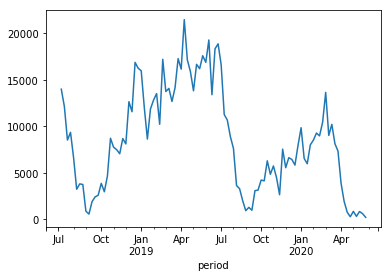

In [33]:
sorted_data['inc'][-100:].plot()

Les cas de varicelle semlent suivre une périodicité annuelle, avec un creux en septembre.

In [35]:
# retrait de l'année 1990 qui en commence que le 3 Décembre
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W') for y in range(1991, sorted_data.index[-1].year)]

In [36]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

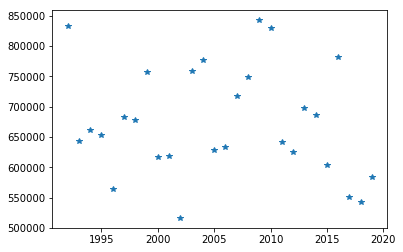

In [37]:
yearly_incidence.plot(style='*')

In [46]:
max_vari = yearly_incidence.max()
annee_max_vari = yearly_incidence.idxmax()

print("Le maximum est de {} pour l'année {}".format(max_vari, annee_max_vari))

Le maximum est de 842373 pour l'année 2009


In [47]:
min_vari = yearly_incidence.min()
annee_min_vari = yearly_incidence.idxmin()

print("Le minimum est de {} pour l'année {}".format(min_vari, annee_min_vari))

Le minimum est de 516689 pour l'année 2002
